# Word Sense Disambiguation
<br>
by : Pradeep Verma

# Importing the libraies

Importing libraries for the  project is crucial for efficient development:

- **Time-saving**: Pre-implemented functions save time.
- **Optimized algorithms**: Efficient computation, especially with large datasets.
- **Community support**: Access to knowledge and resources.
- **Standardized interfaces**: Promotes code reusability.
- **Flexibility**: Offers a wide range of algorithms.
- **Ease of use**: User-friendly APIs and documentation.

In [2]:
import numpy as np 
import pandas as pd
import string

# Loading and downloading the dataset 

- **Size**: The dataset contains 37,500 rows and 75 columns.
- **Context**: Each column represents an acronym with 500 associated contexts.

[Download Dataset](https://conservancy.umn.edu/handle/11299/137703)

In [3]:
df = pd.read_excel("WSD Dataset.xlsx")

In [4]:
df.head()

,Abbreviation,Sense,Context
0,AB,abortion,_%#NAME#%_ _%#NAME#%_ is a 29-year-old gravida...
1,AB,abortion,She is now bleeding quite heavily. Ultrasound ...
2,AB,abortion,ALLERGIES: Heparin and Imitrex. PAST OB HISTOR...
3,AB,abortion,She had a pelvic ultrasound at Park Nicollet o...
4,AB,abortion,"On _%#MMDD2007#%_, normal anatomy with anterio..."


The dataset contains information about abbreviations along with their senses and associated contexts:

- **Abbreviations**: This column contains the abbreviations or acronyms.
- **Sense**: This column represents the sense or meaning of the corresponding abbreviation.
- **Context**: This column provides the context or usage examples associated with each abbreviation.

### Summary:
- **Number of Rows**: 37500 
- **Number of Columns**: 3
- **Data Types**: 
  - Abbreviations: String
  - Sense: String
  - Context: String

In [5]:
df["Abbreviations"] = df['Abbreviation']
df['LABEL'] = df["Sense"]
df['TEXT'] = df["Context"]

Explanation:

- **Abbreviations**: Assigning values from the "Abbreviation" column to a new column named "Abbreviations".
- **LABEL**: Assigning values from the "Sense" column to a new column named "LABEL".
- **TEXT**: Assigning values from the "Context" column to a new column named "TEXT".

In [6]:
del df['Abbreviation'], df['Sense'], df['Context']

Explanation:

The columns "Abbreviation", "Sense", and "Context" are deleted from the DataFrame (df).
Removing these columns may be necessary if they are no longer needed for the analysis or modeling tasks.

# Removing Punctuations for the TEXT 

In [7]:
def removePunctuation(df):
    return [str(t).translate(str.maketrans('','',string.punctuation)) for t in df['TEXT']]

df['TEXT'] = removePunctuation(df)

Explanation:

- **removePunctuation function**: This function takes a DataFrame (df) as input, iterates over the 'TEXT' column, and removes punctuation from each text entry using Python's translate function along with str.maketrans.
- **Applying the function**: The function is applied to the 'TEXT' column of the DataFrame (df) using list comprehension, replacing the original text entries with the cleaned ones.

# Creating Tokens from TEXT data 

In [8]:
def createTokens(df):
    return df['TEXT'].apply(lambda x: x.split(' '))

df['TEXT'] = createTokens(df)

Explanation:

- **createTokens function**: This function takes a DataFrame (df) as input and applies a lambda function to split each text entry in the 'TEXT' column into tokens using whitespace as the delimiter.
- **Applying the function**: The function is applied to the 'TEXT' column of the DataFrame (df), replacing the original text entries with lists of tokens.

# Importing Spacy 

In [9]:
import spacy
nlp = spacy.load('en_core_web_sm')

Explanation:

- **Importing spaCy**: The spacy library is imported to utilize its natural language processing capabilities.
- **Loading English Language Model**: The English language model ('en_core_web_sm') is loaded using the spacy.load() function and assigned to the variable nlp.

# Removing Stopwords from TEXT 

In [10]:
def removeStop(df):
    stopWords = spacy.lang.en.stop_words.STOP_WORDS
    [stopWords.remove(t) for t in df['Abbreviations'].str.lower() if t in stopWords]
    return df['TEXT'].apply(lambda x: [item for item in x if not item in stopWords])

df['TEXT']= removeStop(df)

Explanation:

- **removeStop function**: This function takes a DataFrame (df) as input and removes stopwords from each text entry in the 'TEXT' column. It utilizes the stop words list from the spaCy English language model.
- **Removing stopwords**: Stopwords are removed from each text entry, excluding any stop words that are part of the abbreviations listed in the 'Abbreviations' column.
- **Applying the function**: The function is applied to the 'TEXT' column of the DataFrame (df), updating the column with the text data without stopwords.

# Converting TEXT to lowercase 

In [11]:
def tolower(df):
    return [' '.join([word.lower() for word in text]) for text in df['TEXT']]

df['TEXT'] = tolower(df)

Explanation:

- **tolower function**: This function takes a DataFrame (df) as input and converts each word in the text data to lowercase.
- **Converting to lowercase**: Each text entry is processed to convert all words to lowercase using list comprehension and the lower() method.
- **Applying the function**: The function is applied to the 'TEXT' column of the DataFrame (df), updating the column with the text data converted to lowercase.

# Splitting TEXT into Tokens 

In [12]:
df['TEXT'] = df['TEXT'].str.split()

df.head()

,Abbreviations,LABEL,TEXT
0,AB,abortion,"[name, name, 29yearold, gravida, 3, para, 2002..."
1,AB,abortion,"[she, bleeding, heavily, ultrasound, morning, ..."
2,AB,abortion,"[allergies, heparin, imitrex, past, ob, histor..."
3,AB,abortion,"[she, pelvic, ultrasound, park, nicollet, mmdd..."
4,AB,abortion,"[on, mmdd2007, normal, anatomy, anterior, plac..."


Explanation:

The text data in the 'TEXT' column is split into tokens using the split() method.<br>
Each entry in the 'TEXT' column becomes a list of tokens, where each token represents a word from the original text.

In [13]:
df['TEXT'] = df['TEXT'].apply(lambda x: ' '.join(x))

# Importing the libraires and module for model building 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Explanation:

- **train_test_split**: Used for splitting the dataset into training and testing sets.
- **TfidfVectorizer**: Used for converting text data into TF-IDF vectors.
- **LogisticRegression, KNeighborsClassifier, svm, DecisionTreeClassifier, RandomForestClassifier**: Various classifiers available in scikit-learn for classification tasks.
- **accuracy_score**: Metric to evaluate the accuracy of the classifier predictions.<br>
These modules are essential for building and evaluating machine learning models.

# Spliting the data Into Training and Testing

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df['TEXT'], df['LABEL'], test_size=0.2, random_state=42)


Explanation:

- **X_train**: Training features, containing the text data.
- **X_test**: Testing features, containing the text data.
- **y_train**: Training labels, containing the corresponding labels.
- **y_test**: Testing labels, containing the corresponding labels.
- **train_test_split**: Function used to split the dataset into training and testing sets.
- **test_size**=0.2: Specifies the proportion of the dataset to include in the testing set (here, 20%).
- **random_state=42**: Provides a seed value for randomization, ensuring reproducibility.

# Converting Text Data to TF-IDF Vectors

In [16]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Explanation:

- **tfidf_vectorizer**: Object of TfidfVectorizer class initialized with maximum features set to 5000.
- **fit_transform**: Method used to fit the vectorizer to the training data and transform it into TF-IDF vectors.
- **transform**: Method used to transform the testing data into TF-IDF vectors using the same vectorizer fitted on the training data.<br>
TF-IDF vectorization converts text data into numerical vectors, where each feature represents the importance of a term in a document relative to the entire corpus.

# Logistic Regression 

In [17]:
lr = LogisticRegression()
lr.fit(X_train_tfidf,y_train)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Explanation:

- **LogisticRegression**: Instantiates a Logistic Regression classifier.
- **fit**: Method used to train the Logistic Regression model on the TF-IDF transformed training data (X_train_tfidf) with corresponding labels (y_train).

In [18]:
y_pred1 = lr.predict(X_test_tfidf)

In [19]:
score1=accuracy_score(y_test,y_pred1)


In [20]:
score1

0.8416

- The overall accuracy from the Logistic Regression algorithm is 84.16%

In [21]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred1)
report = classification_report(y_test, y_pred1)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.8416
Classification Report:
                                                    precision    recall  f1-score   support

                                       (PO Box) C4       0.00      0.00      0.00         1
                                        (class) IA       0.00      0.00      0.00         1
                          (complement) component 3       0.44      0.35      0.39        48
                          (complement) component 4       0.30      0.45      0.36        31
                                         (drug) AC       0.82      0.94      0.88        35
                                         (drug) IT       0.00      0.00      0.00         1
                                         (drug) MS       0.00      0.00      0.00         1
                                        (drug) PAC       0.00      0.00      0.00         1
                                         (drug) PD       0.00      0.00      0.00         1
                                       

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In the classification report:
- Precision: the ratio of correctly predicted positive observations to the total predicted positives.
- Recall: the ratio of correctly predicted positive observations to the all observations in actual class.
- F1-score: the weighted average of Precision and Recall.
- Support: the number of actual occurrences of the class in the specified dataset.

These metrics provide insights into the performance of the model across different classes.

In [37]:
def save_classification_report(report_str, file_path):
    with open(file_path, 'w') as file:
        file.write(report_str)

save_classification_report(report, 'lr_classification_report.txt')

- This function save_classification_report takes two parameters: <br> 
  report_str, which is a string containing a classification report, and file_path, which is the path to the file where the     
  report will be saved.
- Inside the function, it opens the file specified by file_path in write mode ('w') using a with statement, which ensures that   
  the file is properly closed after writing.
- It then writes the contents of report_str to the file.
- At the end the classification report is saved as lr_classification_report.txt

# Support Vector Machine

In [27]:
from sklearn import svm

svm_classifier = svm.SVC()


In [28]:
svm_classifier.fit(X_train_tfidf,y_train)

SVC()

Explanation:

- **svm**: Module from scikit-learn containing Support Vector Machine algorithms.
- **SVC**: Instantiates a Support Vector Classification (SVC) model, which is used for classification tasks.
- **svm_classifier**: Variable holding the SVM classifier object.

In [33]:
y_pred2 = svm_classifier.predict(X_test_tfidf)

In [34]:
score2=accuracy_score(y_test,y_pred2)

In [35]:
score2

0.8486666666666667

- Accuracy from Support vactor classifier is 84.86%

In [36]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred2)
report = classification_report(y_test, y_pred2)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.8486666666666667
Classification Report:
                                                    precision    recall  f1-score   support

                                       (PO Box) C4       0.00      0.00      0.00         1
                                        (class) IA       0.00      0.00      0.00         1
                          (complement) component 3       0.41      0.33      0.37        48
                          (complement) component 4       0.26      0.39      0.31        31
                                         (drug) AC       0.91      0.89      0.90        35
                                         (drug) IT       0.00      0.00      0.00         1
                                         (drug) MS       0.00      0.00      0.00         1
                                        (drug) PAC       0.00      0.00      0.00         1
                                         (drug) PD       0.00      0.00      0.00         1
                           

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
def save_classification_report(report_str, file_path):
    with open(file_path, 'w') as file:
        file.write(report_str)

save_classification_report(report, 'svc_classification_report.txt')

- This function save_classification_report takes two parameters: <br> 
  report_str, which is a string containing a classification report, and file_path, which is the path to the file where the     
  report will be saved.
- Inside the function, it opens the file specified by file_path in write mode ('w') using a with statement, which ensures that   
  the file is properly closed after writing.
- It then writes the contents of report_str to the file.
- At the end the classification report is saved as svc_classification_report.txt

# K-Nearest Neighbors

In [40]:
knn=KNeighborsClassifier()
knn.fit(X_train_tfidf,y_train)


KNeighborsClassifier()

Explanation:

- **KNeighborsClassifier**: Instantiates a K-Nearest Neighbors classifier.
- **fit**: Method used to train the KNN model on the TF-IDF transformed training data (X_train_tfidf) with corresponding labels (y_train).

In [41]:
y_pred3 = knn.predict(X_test_tfidf)

In [42]:
score3 = accuracy_score(y_test,y_pred3)

In [43]:
score3 = 62

In [44]:
score3

62

- Accuracy from KNeighbors Classifier is 62%

In [54]:
from sklearn.metrics import accuracy_score, classification_report


accuracy = accuracy_score(y_test, y_pred3)
report = classification_report(y_test, y_pred3)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

def save_classification_report(report_str, file_path):
    with open(file_path, 'w') as file:
        file.write(report_str)

save_classification_report(report, 'knn_classification_report.txt')

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.8486666666666667
Classification Report:
                                                    precision    recall  f1-score   support

                                       (PO Box) C4       0.00      0.00      0.00         1
                                        (class) IA       0.00      0.00      0.00         1
                          (complement) component 3       0.41      0.33      0.37        48
                          (complement) component 4       0.26      0.39      0.31        31
                                         (drug) AC       0.91      0.89      0.90        35
                                         (drug) IT       0.00      0.00      0.00         1
                                         (drug) MS       0.00      0.00      0.00         1
                                        (drug) PAC       0.00      0.00      0.00         1
                                         (drug) PD       0.00      0.00      0.00         1
                           

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree

In [45]:
dt=DecisionTreeClassifier()
dt.fit(X_train_tfidf,y_train)

DecisionTreeClassifier()

Explanation:

- **DecisionTreeClassifier**: Instantiates a Decision Tree classifier.
- **fit**: Method used to train the Decision Tree model on the TF-IDF transformed training data (X_train_tfidf) with corresponding labels (y_train).

In [46]:
y_pred4 = dt.predict(X_test_tfidf)

In [47]:
score4 = accuracy_score(y_test,y_pred4)

In [48]:
score4

0.8549333333333333

- Accuracy from Decision Tree Classifier is 85.49%

In [50]:
from sklearn.metrics import accuracy_score, classification_report


accuracy = accuracy_score(y_test, y_pred4)
report = classification_report(y_test, y_pred4)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

def save_classification_report(report_str, file_path):
    with open(file_path, 'w') as file:
        file.write(report_str)

save_classification_report(report, 'DT_classification_report.txt')

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.8486666666666667
Classification Report:
                                                    precision    recall  f1-score   support

                                       (PO Box) C4       0.00      0.00      0.00         1
                                        (class) IA       0.00      0.00      0.00         1
                          (complement) component 3       0.41      0.33      0.37        48
                          (complement) component 4       0.26      0.39      0.31        31
                                         (drug) AC       0.91      0.89      0.90        35
                                         (drug) IT       0.00      0.00      0.00         1
                                         (drug) MS       0.00      0.00      0.00         1
                                        (drug) PAC       0.00      0.00      0.00         1
                                         (drug) PD       0.00      0.00      0.00         1
                           

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest

In [49]:
rf=RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)

RandomForestClassifier()

Explanation:

- **RandomForestClassifier**: Instantiates Random Forest classifier.
- **fit**: Method used to train the Random Forest model on the TF-IDF transformed training data (X_train_tfidf) with corresponding labels (y_train).

In [51]:
y_pred5 = rf.predict(X_test_tfidf)

In [52]:
score5 = accuracy_score(y_test,y_pred5)

In [53]:
score5

0.8822666666666666

- Accuracy from Random forest classifier is 88.22% which the highest from overall algoritm applied

In [ ]:
from sklearn.metrics import accuracy_score, classification_report


accuracy = accuracy_score(y_test, y_pred5)
report = classification_report(y_test, y_pred5)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

def save_classification_report(report_str, file_path):
    with open(file_path, 'w') as file:
        file.write(report_str)

save_classification_report(report, 'DT_classification_report.txt')

# Creating DataFrame for Model Evaluation 

In [55]:
final_data = pd.DataFrame({'Models':['Logistic Regression','Support Vector Classifier','K-Nearest Neighbor','Decision Tree','Random Forest'],
            'Accuracy':[score1*100,
                   score2*100,
                   score3,
                   score4*100,
                   score5*100]})

Explanation:

- **pd.DataFrame**: Function used to create a DataFrame from a dictionary.
- **Models**: Column containing the names of the models.
- **Accuracy**: Column containing the accuracy scores of the models, multiplied by 100 to represent percentages.

In [56]:
final_data

,Models,Accuracy
0,Logistic Regression,84.160000
1,Support Vector Classifier,84.866667
2,K-Nearest Neighbor,62.000000
3,Decision Tree,85.493333
4,Random Forest,88.226667


- The overall accuracies from all the model is compared throught the dataframe and we get to know the **Random Forest** is giving the highest accuracy

# Visualizing Model Performance

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Support Vector Classifier'),
  Text(2, 0, 'K-Nearest Neighbor'),
  Text(3, 0, 'Decision Tree'),
  Text(4, 0, 'Random Forest')])

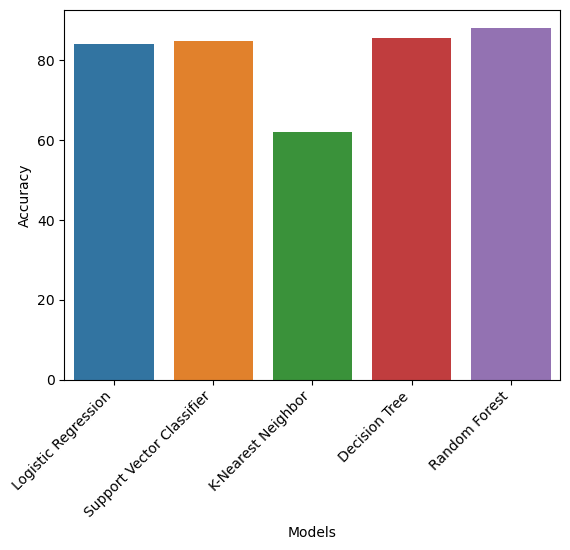

In [60]:
import seaborn as sns

sns.barplot(x=final_data['Models'],y=final_data['Accuracy'])
plt.xticks(rotation=45, ha='right')


Explanation:

- **sns.barplot**: Function from the Seaborn library used to create a bar plot.
- **x**: Data for the x-axis, which is the 'Models' column from the final_data DataFrame.
- **y**: Data for the y-axis, which is the 'ACC' column from the final_data DataFrame.<br>
This bar plot provides a visual comparison of the accuracy scores of different models.

# Saving the model with the highest accuracy 

In [61]:
import joblib
joblib.dump(rf, "rf.pkl")

['rf.pkl']

# Prediction

###  Importing the libraries

In [62]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

The code begins by importing the necessary libraries:<br>
- **nltk**: Natural Language Toolkit, a library for natural language processing tasks.
- **stopwords**: A module from NLTK corpus containing a list of common stopwords in various languages.
- **word_tokenize**: A function from NLTK for tokenizing words from sentences.
- **string**: A module containing a collection of string constants and utility functions.
<br>
These imports are essential for performing text processing tasks such as tokenization and removing stopwords.

### Preporcessing the  given Data

In [63]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word.lower() for word in tokens]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    processed_text = ' '.join(tokens)

    return processed_text

Explanation:

- **preprocess_text function**: This function takes a string of text as input and performs several preprocessing steps, including tokenization, removing non-alphanumeric tokens, converting tokens to lowercase, and removing stopwords.
- **nltk.tokenize.word_tokenize**: Function from the NLTK library used to tokenize the text.
- **nltk.corpus.stopwords**: Set of stopwords from the NLTK library used to remove stopwords from the text.

In [64]:
new_text = "Regular rate and rhythm with a soft systolic ejection murmur. ABDOMEN: Without hepatosplenomegaly. JOINTS: Hand joints - Mild osteoarthritic changes in the DIP and PIP joints. No active synovitis and no evidence of chronic synovitis in her MTPs or wrists."

new_text_processed = preprocess_text(new_text)
new_text_vectorized = tfidf_vectorizer.transform([new_text_processed])


predicted_label = rf.predict(new_text_vectorized)[0]

predicted_label

'distal interphalangeal'

Explanation:

- **new_text**: The new text to be processed and classified.
- **preprocess_text**: The preprocess_text function is applied to the new text to preprocess it.
- **tfidf_vectorizer**: The TF-IDF vectorizer is then used to transform the preprocessed text into TF-IDF vectors.
- **rf**: The trained Random Forest classifier (rf) is used to predict the label for the new text based on the TF-IDF vectors.
- **predicted_label**: The predicted label for the new text.

# Visualization for report 

## Train & Test Visualization

In [44]:
df.head()

,Abbreviations,LABEL,TEXT
0,AB,abortion,name name 29yearold gravida 3 para 2002 presen...
1,AB,abortion,she bleeding heavily ultrasound morning demons...
2,AB,abortion,allergies heparin imitrex past ob history 1 19...
3,AB,abortion,she pelvic ultrasound park nicollet mmdd showe...
4,AB,abortion,on mmdd2007 normal anatomy anterior placenta n...


In [45]:
train_accuracy = []
test_accuracy = []


In [46]:
# Logistic Regression
train_accuracy.append(accuracy_score(y_train, lr.predict(X_train_tfidf)))
test_accuracy.append(accuracy_score(y_test, lr.predict(X_test_tfidf)))

# K-Nearest Neighbors
train_accuracy.append(accuracy_score(y_train, knn.predict(X_train_tfidf)))
test_accuracy.append(accuracy_score(y_test, knn.predict(X_test_tfidf)))

# Decision Tree
train_accuracy.append(accuracy_score(y_train, dt.predict(X_train_tfidf)))
test_accuracy.append(accuracy_score(y_test, dt.predict(X_test_tfidf)))

# Random Forest
train_accuracy.append(accuracy_score(y_train, rf.predict(X_train_tfidf)))
test_accuracy.append(accuracy_score(y_test, rf.predict(X_test_tfidf)))

#SVM 
train_accuracy.append(accuracy_score(y_train, svm_classifier.predict(X_train_tfidf)))
test_accuracy.append(accuracy_score(y_test, svm_classifier.predict(X_test_tfidf)))




### Explanation:

- **Logistic Regression**:
  - The accuracy of the logistic regression model on the training set (`X_train_tfidf`) is calculated using the `accuracy_score` function from the appropriate target (`y_train`).
  - Similarly, the accuracy of the logistic regression model on the test set (`X_test_tfidf`) is calculated.
  - Both training and test accuracies are appended to the `train_accuracy` and `test_accuracy` lists respectively.
  
  
  - Same process is applied to the model.

- **K-Nearest Neighbors (KNN)**:
- **Decision Tree**:
- **Random Forest**:
- **Support Vector Machine (SVM)**:

Each block of code calculates the accuracy of a specific machine learning model (Logistic Regression, KNN, Decision Tree, Random Forest, SVM) on both the training and test sets, and appends these accuracies to separate lists (`train_accuracy` and `test_accuracy`).


In [93]:
model_names = ['Logistic Regression', 'K-Nearest Neighbors','Decision Tree', 'Random Forest', 'Support Vector']


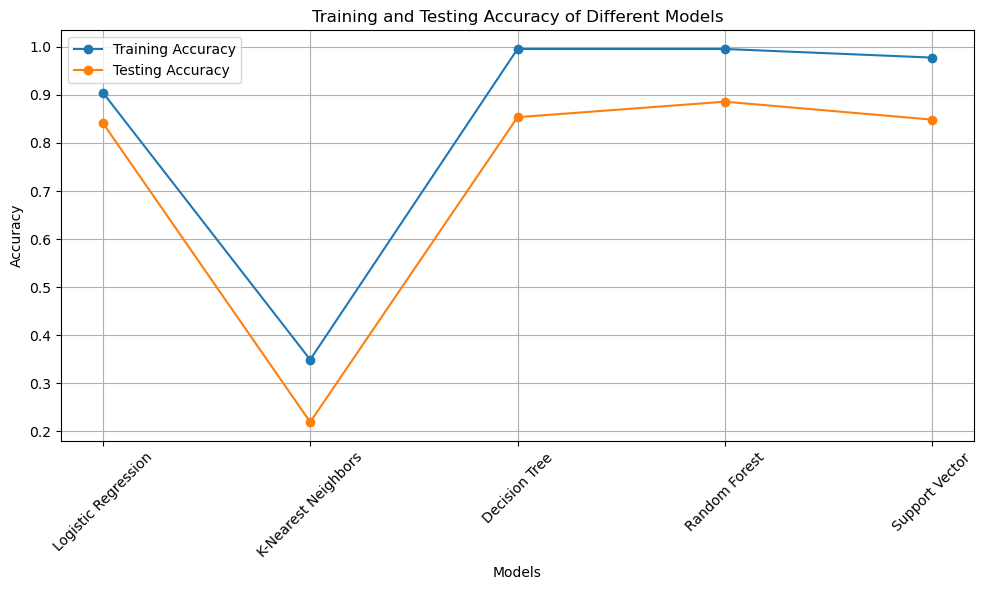

In [94]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(model_names, train_accuracy, marker='o', label='Training Accuracy')
plt.plot(model_names, test_accuracy, marker='o', label='Testing Accuracy')
plt.title('Training and Testing Accuracy of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# precision recall f1 score

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [51]:
# Logistic Regression
precision_lr = precision_score(y_test, y_pred1, average='weighted')
recall_lr = recall_score(y_test, y_pred1, average='weighted')
f1_lr = f1_score(y_test, y_pred1, average='weighted')

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
# SVM 
precision_svm = precision_score(y_test, y_pred2, average='weighted')
recall_svm = recall_score(y_test, y_pred2, average='weighted')
f1_svm = f1_score(y_test, y_pred2, average='weighted')

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
# KNN
precision_knn = precision_score(y_test, y_pred3, average='weighted')
recall_knn = recall_score(y_test, y_pred3, average='weighted')
f1_knn = f1_score(y_test, y_pred3, average='weighted')

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
# DT
precision_dt = precision_score(y_test, y_pred4, average='weighted')
recall_dt = recall_score(y_test, y_pred4, average='weighted')
f1_dt = f1_score(y_test, y_pred4, average='weighted')

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
# rf
precision_rf = precision_score(y_test, y_pred5, average='weighted')
recall_rf = recall_score(y_test, y_pred5, average='weighted')
f1_rf = f1_score(y_test, y_pred5, average='weighted')

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
scores_data = pd.DataFrame({
    'Model': ['LR', 'SVM','DT', 'RF'],
    'Precision': [precision_lr, precision_svm, precision_dt, precision_rf],
    'Recall': [recall_lr, recall_svm, recall_dt, recall_rf],
    'F1 Score': [f1_lr, f1_svm, f1_dt, f1_rf]
})

NameError: name 'precision_lr' is not defined

Explaination:
- This code creates a Pandas DataFrame named scores_data.
- The DataFrame consists of four columns: 'Model', 'Precision', 'Recall', and 'F1 Score'.
- Each row corresponds to a machine learning model's evaluation metrics.
- The 'Model' column contains the names of the models: LR (Logistic Regression), SVM (Support Vector Machine), DT (Decision Tree), and RF (Random Forest).
- The 'Precision', 'Recall', and 'F1 Score' columns contain the precision, recall, and F1 score values respectively for each     
  model.
- The values for precision, recall, and F1 score are fetched from variables precision_lr, precision_svm, precision_dt, 
  precision_rf, recall_lr, recall_svm, recall_dt, recall_rf, f1_lr, f1_svm, f1_dt, and f1_rf which are assumed to be calculated 
  elsewhere in the code. These variables likely hold the evaluation metrics computed for each model during model evaluation.
- This DataFrame is useful for storing and comparing the evaluation metrics of different machine learning models, which aids in model selection and performance analysis.

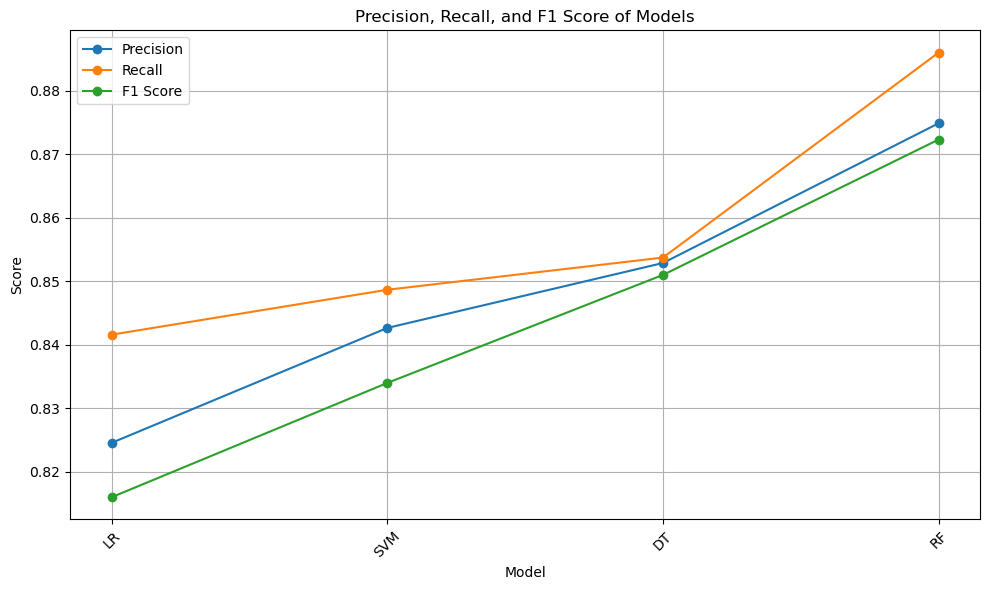

In [86]:
plt.figure(figsize=(10, 6))

plt.plot(scores_data['Model'], scores_data['Precision'], marker='o', label='Precision')
plt.plot(scores_data['Model'], scores_data['Recall'], marker='o', label='Recall')
plt.plot(scores_data['Model'], scores_data['F1 Score'], marker='o', label='F1 Score')

plt.title('Precision, Recall, and F1 Score of Models')
plt.xlabel('Model')b
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The main agenda of the code is to visualize and compare the performance metrics (precision, recall, and F1 score) of multiple machine learning models using a line plot.

# Error Analysis 

In [60]:
def error_analysis(model, X_test, y_test, y_pred):
    misclassified_examples = []

    # Iterate through test set
    for i in range(len(X_test)):
        if y_test.iloc[i] != y_pred[i]:
            misclassified_examples.append({
                'Text': X_test.iloc[i],
                'True Label': y_test.iloc[i],
                'Predicted Label': y_pred[i]
            })
    
    # Print some misclassified examples
    print("Misclassified Examples:")
    for idx, example in enumerate(misclassified_examples[:5]):  # Print first 5 misclassified examples
        print(f"Example {idx+1}:")
        print(f"Text: {example['Text']}")
        print(f"True Label: {example['True Label']}")
        print(f"Predicted Label: {example['Predicted Label']}")
        print("------------------------")
    
    # Error analysis summary
    total_misclassified = len(misclassified_examples)
    total_examples = len(X_test)
    error_rate = total_misclassified / total_examples
    print(f"Total Misclassified Examples: {total_misclassified}/{total_examples}")
    print(f"Error Rate: {error_rate:.2%}")



### Explanation:

- **Function Definition**:
  - The function `error_analysis` takes four parameters: `model`, `X_test`, `y_test`, and `y_pred`.
  - `model` is the trained machine learning model.
  - `X_test` is the feature data of the test set.
  - `y_test` is the true labels of the test set.
  - `y_pred` is the predicted labels of the test set.

- **Error Analysis**:
  - The function iterates through the test set and identifies misclassified examples where the true label (`y_test`) does not match the predicted label (`y_pred`). These misclassified examples are stored in the `misclassified_examples` list as dictionaries containing the text, true label, and predicted label.
  - It then prints some of the misclassified examples (by default, the first 5) including their text, true label, and predicted label.

- **Error Analysis Summary**:
  - After printing misclassified examples, the function calculates and prints an error analysis summary.
  - It calculates the total number of misclassified examples, the total number of examples in the test set, and the error rate (percentage of misclassified examples).
  - The error rate is formatted as a percentage with two decimal places.

Overall, this function provides a simple yet effective way to perform error analysis on a machine learning model's predictions, helping to identify patterns and areas for improvement in the model's performance.


In [61]:
print("Error Analysis for Logistic Regression:")
error_analysis(lr, X_test, y_test, y_pred1)

Error Analysis for Logistic Regression:
Misclassified Examples:
Example 1:
Text: the patient instructed stop taking aspirin today continue medications her hemoglobin 140 potassium pending ekg showed normal sinus rhythm rapid rwave progression qwave avr
True Label: augmented voltage right arm
Predicted Label: aortic valve replacement
------------------------
Example 2:
Text: she desires request repeat cesarean section term desire trial labor her antepartum course essentially uncomplicated history positive ama mm 2002 subsequently ama performed negative she taking baby aspirin pregnancy stop approximately 48 hours surgery
True Label: antimitochondrial antibody
Predicted Label: against medical advice
------------------------
Example 3:
Text: for details history present illness review systems physical exam time admission admission hp mmdd2007 hospital course 1 fever the patient admitted general medicine floor the concern initially cs infection patient recently ventriculostomy hardware remo

In [62]:
print("\nError Analysis for SVM:")
error_analysis(svm_classifier, X_test, y_test, y_pred2)



Error Analysis for SVM:
Misclassified Examples:
Example 1:
Text: she desires request repeat cesarean section term desire trial labor her antepartum course essentially uncomplicated history positive ama mm 2002 subsequently ama performed negative she taking baby aspirin pregnancy stop approximately 48 hours surgery
True Label: antimitochondrial antibody
Predicted Label: against medical advice
------------------------
Example 2:
Text: for details history present illness review systems physical exam time admission admission hp mmdd2007 hospital course 1 fever the patient admitted general medicine floor the concern initially cs infection patient recently ventriculostomy hardware removal his physical examination laboratory workup confirm suspicion
True Label: central nervous system:CNS
Predicted Label: operating room
------------------------
Example 3:
Text: 2 contact group home confirm lantus novolog insulin dose diet 3 accucheks qid ac hs lantusnovolog coverage group home 4 continue kefl

In [63]:
print("\nError Analysis for KNN:")
error_analysis(knn, X_test, y_test, y_pred3)



Error Analysis for KNN:
Misclassified Examples:
Example 1:
Text: seroquel worked multiple antidepressants worked the patient reports moved gal divorce basically tells alcohol problems away the patient try attend na aa meetings reports benzodiazepines the patient experiences frequent panic attacks long time he drive car or grocery store
True Label: Narcotics Anonymous
Predicted Label: T1 (MRI)
------------------------
Example 2:
Text: she discharged prednisone 1 mgkg it note steroid refractory itp course four rituximab infusions planned the patient understands seen nearest emergency room recurrence bleeding
True Label: idiopathic thrombocytopenic purpura
Predicted Label: T1 (MRI)
------------------------
Example 3:
Text: the patient instructed stop taking aspirin today continue medications her hemoglobin 140 potassium pending ekg showed normal sinus rhythm rapid rwave progression qwave avr
True Label: augmented voltage right arm
Predicted Label: T1 (MRI)
------------------------
Exampl

In [64]:
print("\nError Analysis for Decision Tree:")
error_analysis(dt, X_test, y_test, y_pred4)


Error Analysis for Decision Tree:
Misclassified Examples:
Example 1:
Text: she desires request repeat cesarean section term desire trial labor her antepartum course essentially uncomplicated history positive ama mm 2002 subsequently ama performed negative she taking baby aspirin pregnancy stop approximately 48 hours surgery
True Label: antimitochondrial antibody
Predicted Label: advanced maternal age
------------------------
Example 2:
Text: for details history present illness review systems physical exam time admission admission hp mmdd2007 hospital course 1 fever the patient admitted general medicine floor the concern initially cs infection patient recently ventriculostomy hardware removal his physical examination laboratory workup confirm suspicion
True Label: central nervous system:CNS
Predicted Label: culture and sensitivity
------------------------
Example 3:
Text: neurology consultation obtained dr name ordered mri cervical spine showed solid fusion c4 c7 mild degenerative retr

In [65]:
print("\nError Analysis for Random Forest:")
error_analysis(rf, X_test, y_test, y_pred5)


Error Analysis for Random Forest:
Misclassified Examples:
Example 1:
Text: she desires request repeat cesarean section term desire trial labor her antepartum course essentially uncomplicated history positive ama mm 2002 subsequently ama performed negative she taking baby aspirin pregnancy stop approximately 48 hours surgery
True Label: antimitochondrial antibody
Predicted Label: against medical advice
------------------------
Example 2:
Text: for details history present illness review systems physical exam time admission admission hp mmdd2007 hospital course 1 fever the patient admitted general medicine floor the concern initially cs infection patient recently ventriculostomy hardware removal his physical examination laboratory workup confirm suspicion
True Label: central nervous system:CNS
Predicted Label: culture and sensitivity
------------------------
Example 3:
Text: neurology consultation obtained dr name ordered mri cervical spine showed solid fusion c4 c7 mild degenerative ret

# Visualization of error analysis 

In [66]:
def visualize_error_analysis(model_name, y_test, y_pred):
    # Count misclassifications for each class
    misclassified_counts = {'True Positive': 0, 'True Negative': 0, 'False Positive': 0, 'False Negative': 0}
    for true_label, pred_label in zip(y_test, y_pred):
        if true_label == pred_label:
            if true_label == 1:  # True Positive
                misclassified_counts['True Positive'] += 1
            else:  # True Negative
                misclassified_counts['True Negative'] += 1
        else:
            if true_label == 1:  # False Negative
                misclassified_counts['False Negative'] += 1
            else:  # False Positive
                misclassified_counts['False Positive'] += 1

    # Plot the misclassified counts
    plt.figure(figsize=(8, 6))
    plt.bar(misclassified_counts.keys(), misclassified_counts.values(), color=['green', 'green', 'red', 'red'])
    plt.title(f'Error Analysis for {model_name}')
    plt.xlabel('Misclassification Type')
    plt.ylabel('Count')
    plt.show()


### Explanation:

- **Function Definition**:
  - The function `visualize_error_analysis` takes three parameters: `model_name`, `y_test`, and `y_pred`.
  - `model_name` is a string indicating the name of the model being analyzed.
  - `y_test` is the true labels of the test set.
  - `y_pred` is the predicted labels of the test set.

- **Counting Misclassifications**:
  - The function initializes a dictionary `misclassified_counts` to count the occurrences of different types of misclassifications: True Positive, True Negative, False Positive, and False Negative.
  - It iterates through each pair of true labels (`true_label`) and predicted labels (`pred_label`) using the `zip` function.
  - For each pair, it checks if the true label matches the predicted label to determine whether it's a true positive/negative or a false positive/negative, and updates the corresponding count in `misclassified_counts`.

- **Plotting Misclassified Counts**:
  - After counting the misclassifications, the function creates a bar plot to visualize the counts using Matplotlib.
  - The x-axis represents the types of misclassifications, and the y-axis represents the counts.
  - The colors green and red are used to differentiate between correct and incorrect classifications.
  - The plot is displayed using `plt.show()`.

Overall, this function provides a visual representation of the types and counts of misclassifications made by a machine learning model, aiding in understanding its performance and identifying areas for improvement.


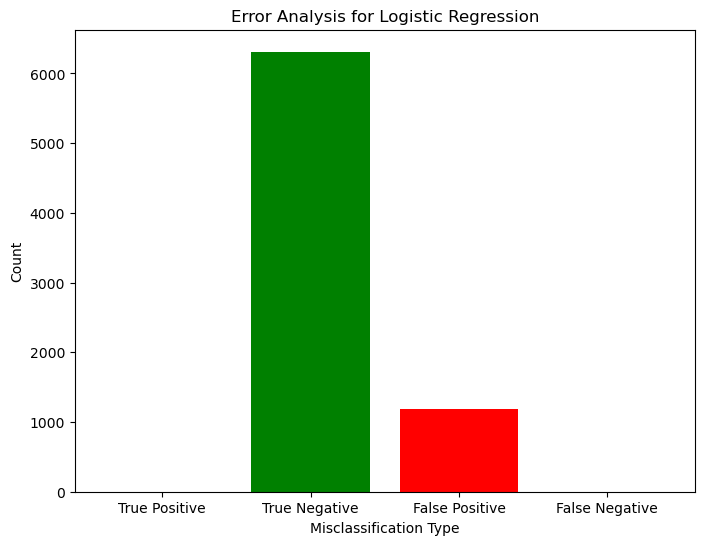

In [69]:
visualize_error_analysis('Logistic Regression', y_test, y_pred1)

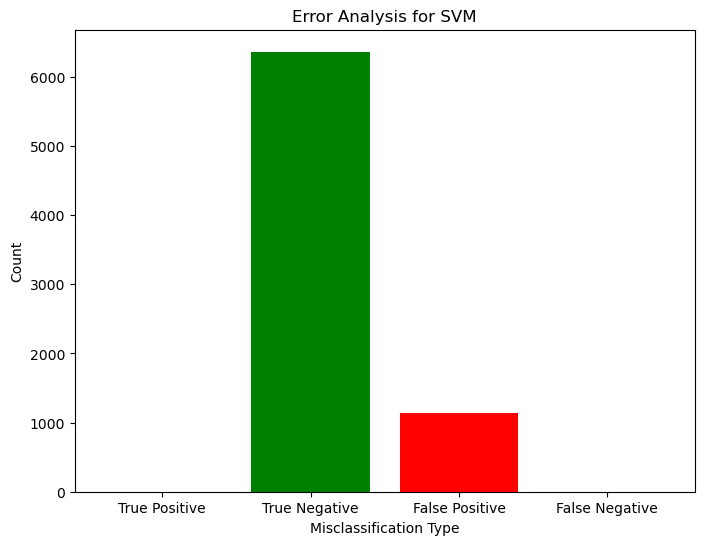

In [70]:
visualize_error_analysis('SVM', y_test, y_pred2)

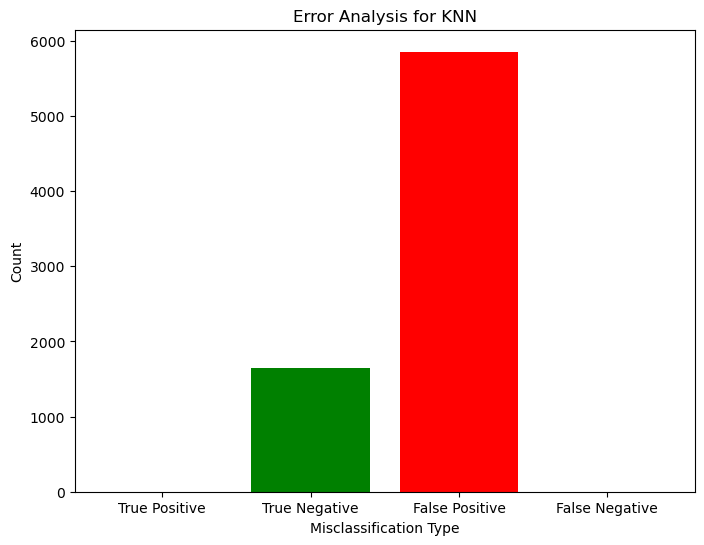

In [71]:
visualize_error_analysis('KNN', y_test, y_pred3)

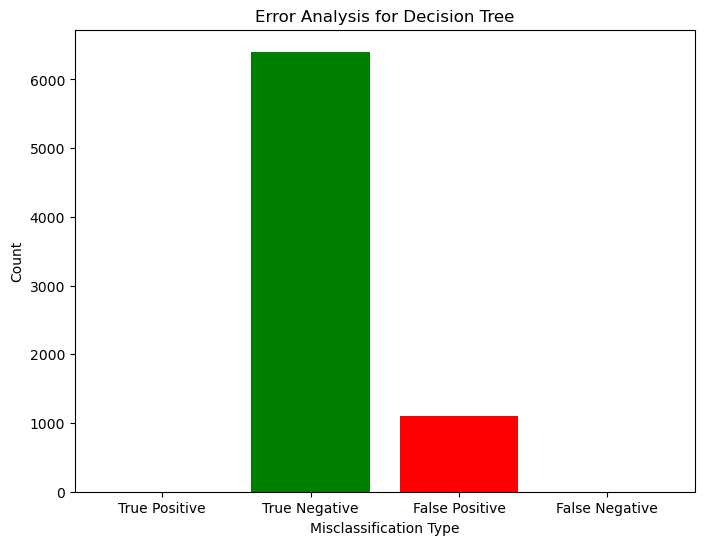

In [72]:
visualize_error_analysis('Decision Tree', y_test, y_pred4)

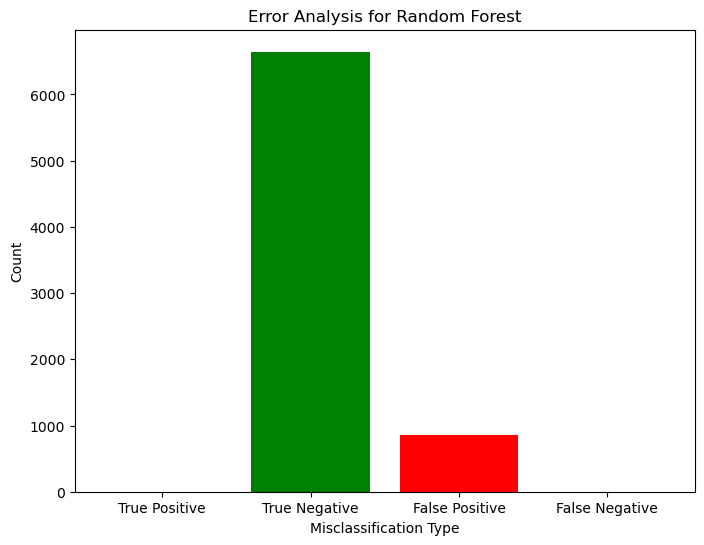

In [73]:
visualize_error_analysis('Random Forest', y_test, y_pred5)

# Thank You!!! 